## Let's look at matrices together

Here I demonstrate how to look deeper in what happens in MCEq.

Follow my presentation. Afterwards I will commit changes to github.

To pull changes (if any) to your directory, you can then do:

    git pull
    
Exercise:

    1) Look at the distribution of kaons (321, -321), protons (2212) and neutrons (2112).

Particles are indexed according to the PDG convention http://pdg.lbl.gov/2018/reviews/rpp2018-rev-monte-carlo-numbering.pdf
    
   

In [58]:
#usual imports and jupyter setup
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os
import matplotlib.pyplot as plt
import numpy as np

# Path to MCEq. Can be uncommented if in PYTHONPATH
import sys
sys.path.append('../MCEq/')

#import solver related modules
from MCEq.core import MCEqRun
from mceq_config import config
#import primary model choices
import CRFluxModels as pm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
# Disable semi-analytical approximation
config['adv_set']['no_mixing'] = True

In [13]:
mceq_run_no_mix = MCEqRun(
#provide the string of the interaction model
interaction_model='SIBYLL2.3c',
#primary cosmic ray flux model
#support a tuple (primary model class (not instance!), arguments)
primary_model=(pm.Thunman,None), #(pm.HillasGaisser2012, 'H3a'),
# Zenith angle in degrees. 0=vertical, 90=horizontal
theta_deg=0.0,
#expand the rest of the options from mceq_config.py
**config
)

InteractionYields::_load(): Looking for /mnt/c/Users/afedy/OneDrive/devel/git/MCEq/data/SIBYLL23C_yields_compact_ledpm.bz2
DecayYields:_load():: Loading file /mnt/c/Users/afedy/OneDrive/devel/git/MCEq/data/compact_decay_tables.ppd

Hadrons and stable particles:

"p", "p-bar", "n-bar", "n", "pi-", "pi+", "K0L", "K-", 
"K+", "Lambda0", "Lambda0-bar", "K0S", "D+", "D-", "Ds+", "Ds-", 
"D0", "D0-bar"

Mixed:



Resonances:



Leptons:

"e-", "nue", "numu", "nutau", "gamma", "antinutau", "antinumu", "antinue", 
"e+", "mu-", "mu+"

Aliases:
"obs_numu", "obs_nutau", "pr_antinutau", "pr_antinumu", "pr_antinue", "obs_antinue", "k_nue", "k_numu", 
"k_nutau", "pi_antinutau", "pi_antinue", "pi_antinumu", "pi_nue", "pi_numu", "pi_nutau", "k_antinutau", 
"k_antinumu", "k_antinue", "obs_nue", "pr_nue", "pr_numu", "pr_nutau", "obs_antinutau", "obs_antinumu", 
"k_mu-", "obs_mu-", "pr_mu+", "pi_mu+", "pi_mu-", "k_mu+", "pr_mu-", "obs_mu+"

Total number of species: 61
MCEqRun::set_interaction_model():  S

## Shows the structure of interaction and decay matrix. These are the C and D matrix

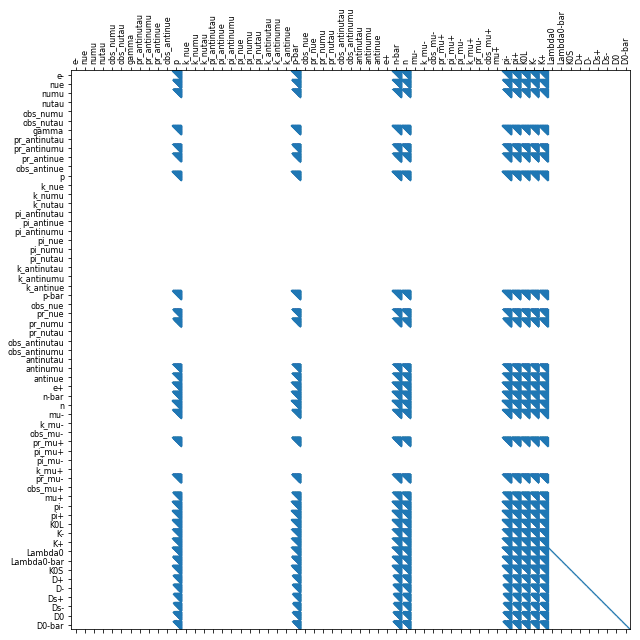

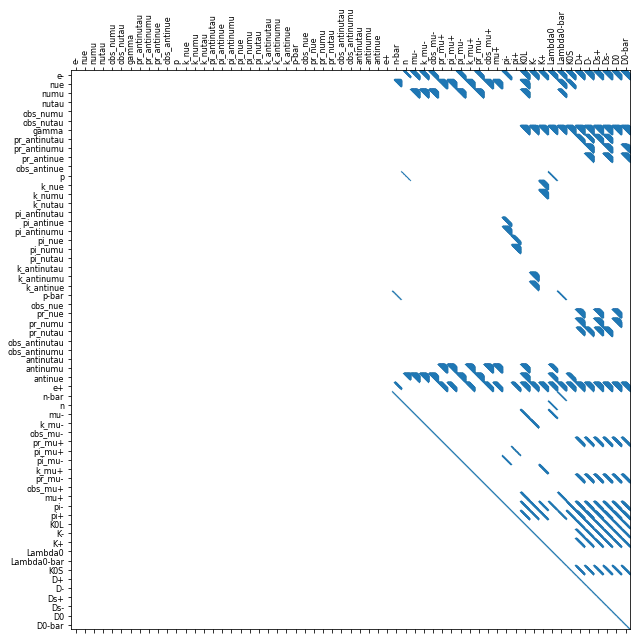

In [18]:
M_int = mceq_run_no_mix.int_m 
M_dec = mceq_run_no_mix.dec_m*mceq_run_no_mix.density_model.rho_inv(1000.,1.)

plt.figure(figsize=(9,9))
plt.spy(M_int,marker='o',markersize=0.1)
tickloc = np.arange(mceq_run_no_mix.n_tot_species)*mceq_run_no_mix.d + mceq_run_no_mix.d/2.
tickstr = [p.name for p in mceq_run_no_mix.particle_species]
t = plt.xticks(tickloc, tickstr,fontsize=8, rotation=90)
t = plt.yticks(tickloc, tickstr,fontsize=8, rotation=0)
plt.tight_layout()

plt.figure(figsize=(9,9))
plt.spy(M_dec,marker='o',markersize=0.1)
tickloc = np.arange(mceq_run_no_mix.n_tot_species)*mceq_run_no_mix.d + mceq_run_no_mix.d/2.
tickstr = [p.name for p in mceq_run_no_mix.particle_species]
t = plt.xticks(tickloc, tickstr,fontsize=8, rotation=90)
t = plt.yticks(tickloc, tickstr,fontsize=8, rotation=0)
plt.tight_layout()

In [21]:
## Let's look at particle production matrices

In [24]:
#Shortcut to MCEq.data.InteractionYields
prod_mat = mceq_run_no_mix.y

/home/afedyni/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


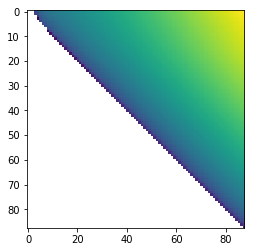

In [47]:
# Pion production matrix
pi_mat = prod_mat.get_y_matrix(2212, 211)
plt.imshow(np.log(pi_mat))

proton-air collision lab energy=6.49e+03
proton-air collision lab energy=2.05e+06
proton-air collision lab energy=6.49e+08


Text(0.5,0,'Elab (GeV)')

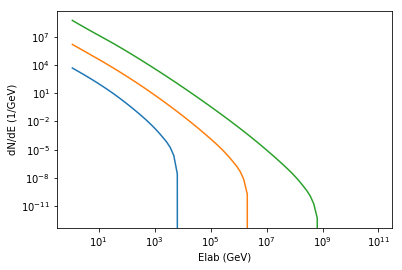

In [46]:
# Select vertical slice
egrid = mceq_run_no_mix.e_grid
for eidx in [30,50,70]:
    print 'proton-air collision lab energy=%3.2e' % egrid[eidx]
    plt.loglog(egrid,pi_mat[:,eidx]/mceq_run_no_mix.e_widths)
plt.ylabel('dN/dE (1/GeV)')
plt.xlabel('Elab (GeV)')
plt.title('Pion inclusive spectra')

Nearest energy, index:  865.9643233600654 23
Nearest energy, index:  865.9643233600654 23


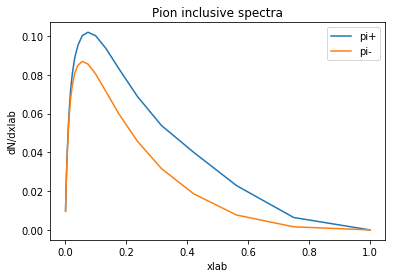

In [59]:
xlab, dndxlab = prod_mat.get_xlab_dist(1e3,2212,211)
plt.plot(xlab, xlab**1.7*dndxlab,label='pi+')
xlab, dndxlab = prod_mat.get_xlab_dist(1e3,2212,-211)
plt.plot(xlab, xlab**1.7*dndxlab,label='pi-')
plt.ylabel('dN/dxlab')
plt.xlabel('xlab')
plt.title('Pion inclusive spectra')
plt.legend()